<a href="https://colab.research.google.com/github/raihan-tanvir/bengali-hwcr/blob/master/bhwcr_cmaterdb_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
!wget https://www.dropbox.com/s/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
!unrar x CMATERdb\ 3.1.2.rar -idq

--2020-09-19 08:45:35--  https://www.dropbox.com/s/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar [following]
--2020-09-19 08:45:35--  https://www.dropbox.com/s/raw/55bhfr3ycvsewsi/CMATERdb%203.1.2.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd22d2909f77e6f6f8b8473eda.dl.dropboxusercontent.com/cd/0/inline/A_pGAWR3FXIgUhZgCAfAjixVO4-b1I2sb0qzPCWpZm79oWBj5xS0Oiahudm6O4HtVwGHE0DKVxp1q5i0OTtcYkvwWwe7MCIjp6Sq0xLwslY1rg/file# [following]
--2020-09-19 08:45:35--  https://ucdd22d2909f77e6f6f8b8473eda.dl.dropboxusercontent.com/cd/0/inline/A_pGAWR3FXIgUhZgCAfAjixVO4-b1I2sb0qzPCWpZm79oWBj5xS0Oiahudm6O4HtVwGHE0DKVxp1q5i0OTtcYkvwWwe7MCIjp6Sq0xLwslY1

In [ ]:
train_path = os.getcwd()+'/BasicFinalDatabase/Train'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(train_path))]
label_map = ['অ','আ','ই ','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ',
             'ক','খ','গ','ঘ','ঙ',
             'চ','ছ','জ','ঝ','ঞ', 
             'ট','ঠ','ড','ঢ','ণ',
             'ত','থ','দ','ধ','ন',
             'প','ফ','ব','ভ','ম',
             'য','র','ল',
             'শ','ষ','স','হ',
             'য়','ড়','ঢ়','ৎ','ং','ঃ','ঁ']
Temp = []
for folder in folders:
    images = os.listdir((train_path+folder))
    temp = []
    for image in images:
      try:
        img = Image.open(train_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        arr = arr / 255.0
        Temp.append(arr)
      except:
        continue
X_orig = np.stack(Temp)
print(X_orig.shape)

(12000, 32, 32, 1)


In [ ]:
Y_orig = []
[Y_orig.extend([bc]*240) for bc in range(len(label_map))]
Y_orig = np.stack(Y_orig)
Y_orig = keras.utils.to_categorical(Y_orig, len(np.unique(Y_orig)))
print(Y_orig.shape)

(12000, 50)


In [ ]:
indices = np.arange(X_orig.shape[0])
np.random.shuffle(indices)
X_orig = X_orig[indices]
Y_orig = Y_orig[indices]

print(X_orig.shape,Y_orig.shape)

(12000, 32, 32, 1) (12000, 50)


In [ ]:
test_path = os.getcwd()+'/BasicFinalDatabase/Test'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(test_path))]

Temp2 = []
for folder in folders:
    images = os.listdir((test_path+folder))
    for image in images:
      try:
        img = Image.open(test_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        arr = arr / 255.0
        Temp2.append(arr)
      except:
        continue
        
X_test = np.stack(Temp2)
print(X_test.shape)

(3000, 32, 32, 1)


In [ ]:
Y_test = []
[Y_test.extend([bc]*60) for bc in range(len(label_map))]
Y_test = np.stack(Y_test)
Y_test = keras.utils.to_categorical(Y_test, len(np.unique(Y_test)))
print(Y_test.shape)

(3000, 50)


In [ ]:
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

print(X_test.shape,Y_test.shape)

(3000, 32, 32, 1) (3000, 50)


In [ ]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X_orig, Y_orig, test_size=0.2, shuffle=False)
X_train.shape,Y_train.shape,X_dev.shape,Y_dev.shape

((9600, 32, 32, 1), (9600, 50), (2400, 32, 32, 1), (2400, 50))

In [ ]:
bs=64
ep=25
drop_prob=0.2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_prob))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='softmax'))

opt = keras.optimizers.Adam()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
          batch_size=bs,
          epochs=ep,
          verbose=1,
          validation_data=(X_dev, Y_dev))
print(history)

Epoch 1/25
150/150 [==============================] - 11s 76ms/step - loss: 2.9023 - accuracy: 0.2526 - val_loss: 1.5675 - val_accuracy: 0.5754
Epoch 2/25
150/150 [==============================] - 12s 81ms/step - loss: 1.2088 - accuracy: 0.6573 - val_loss: 0.9251 - val_accuracy: 0.7446
Epoch 3/25
150/150 [==============================] - 12s 79ms/step - loss: 0.7835 - accuracy: 0.7782 - val_loss: 0.7623 - val_accuracy: 0.7879
Epoch 4/25
150/150 [==============================] - 12s 82ms/step - loss: 0.6025 - accuracy: 0.8248 - val_loss: 0.6829 - val_accuracy: 0.7971
Epoch 5/25
150/150 [==============================] - 11s 76ms/step - loss: 0.4836 - accuracy: 0.8557 - val_loss: 0.6200 - val_accuracy: 0.8213
Epoch 6/25
150/150 [==============================] - 12s 79ms/step - loss: 0.3818 - accuracy: 0.8843 - val_loss: 0.5723 - val_accuracy: 0.8400
Epoch 7/25
150/150 [==============================] - 12s 78ms/step - loss: 0.3078 - accuracy: 0.9095 - val_loss: 0.5491 - val_accuracy:

In [ ]:
from datetime import datetime
now = str(datetime.now())

project_dir = '/content/drive/Shared drives/4.2/SoftcomProject/bhwcr-cmaterdb-keras/'

model_json = model.to_json()
with open("/content/drive/Shared drives/4.2/SoftcomProject/bhwcr-cmaterdb-keras/model_25_64.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights(project_dir+"/model_"+str(ep)+"_"+str(bs)+"_"+now+".h5")

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

94/94 [==============================] - 1s 11ms/step - loss: 0.7168 - accuracy: 0.8607
Test loss: 0.7168163061141968
Test accuracy: 0.8606666922569275


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


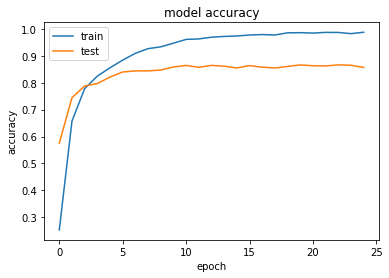

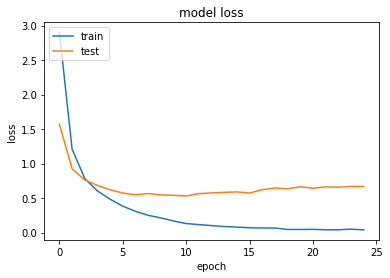

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model_dir="/content/drive/Shared drives/4.2/SoftcomProject/bhwcr-cmaterdb-keras/model_25_64_2020-09-19 08:57:06.588633.h5"
model_json="/content/drive/Shared drives/4.2/SoftcomProject/bhwcr-cmaterdb-keras/model_25_64.json"

json_file = open(model_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights(model_dir)
print("model loaded")

model loaded


In [26]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

94/94 [==============================] - 1s 13ms/step - loss: 0.7168 - accuracy: 0.8607
accuracy: 86.07%


In [41]:
'''
label_map = np.array(['অ','আ','ই ','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ',
             'ক','খ','গ','ঘ','ঙ',
             'চ','ছ','জ','ঝ','ঞ', 
             'ট','ঠ','ড','ঢ','ণ',
             'ত','থ','দ','ধ','ন',
             'প','ফ','ব','ভ','ম',
             'য','র','ল',
             'শ','ষ','স','হ',
             'য়','ড়','ঢ়','ৎ','ং','ঃ','ঁ'])

preds = model.predict(X_test) 
preds_single = Y_test[np.argmax(Y_test, axis = -1)]
actual_single = Y_test[np.argmax(Y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img.fromarray(data, 'RGB'))
  '''